# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_bike_sharing_dataset.csv')

In [18]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday 
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [19]:
df.memory_usage()
df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


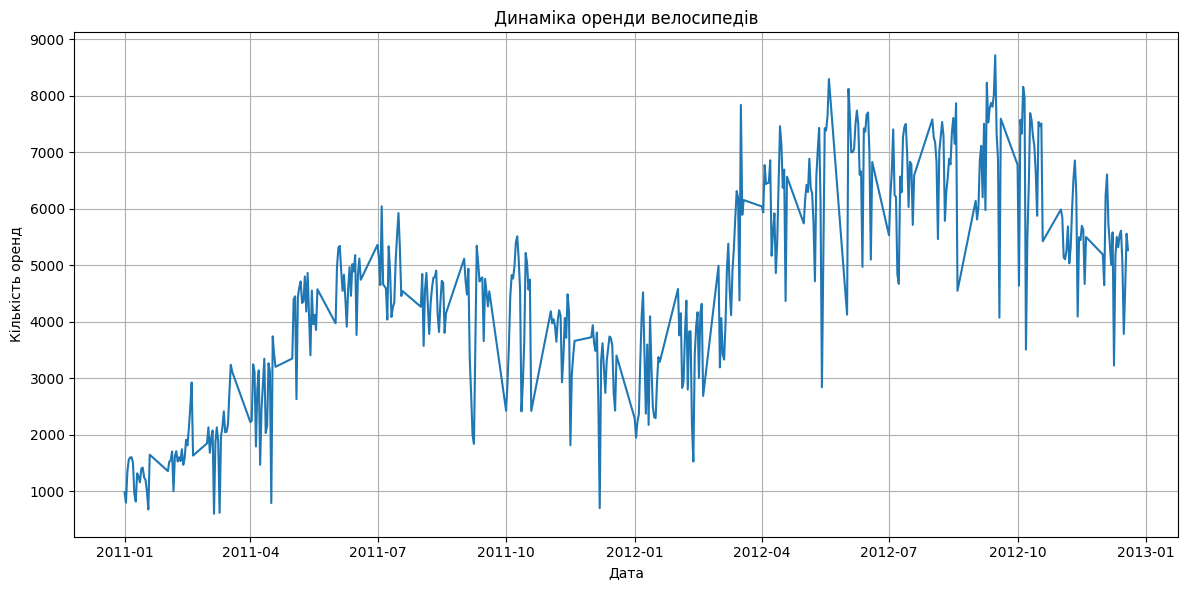

In [22]:
import matplotlib.pyplot as plt
daily_counts = df.groupby('date')['count'].sum()


plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Динаміка оренди велосипедів')
plt.xlabel('Дата')
plt.ylabel('Кількість оренд')
plt.grid(True)
plt.tight_layout()
plt.show()

заломи можуть бути бо є наявність вихідних і святкових днів, коли оренда зменшується.
Нестабільна погода (дощ, сніг, вітер).
щоб показати без заломів можна усереднити до відображень неділь 

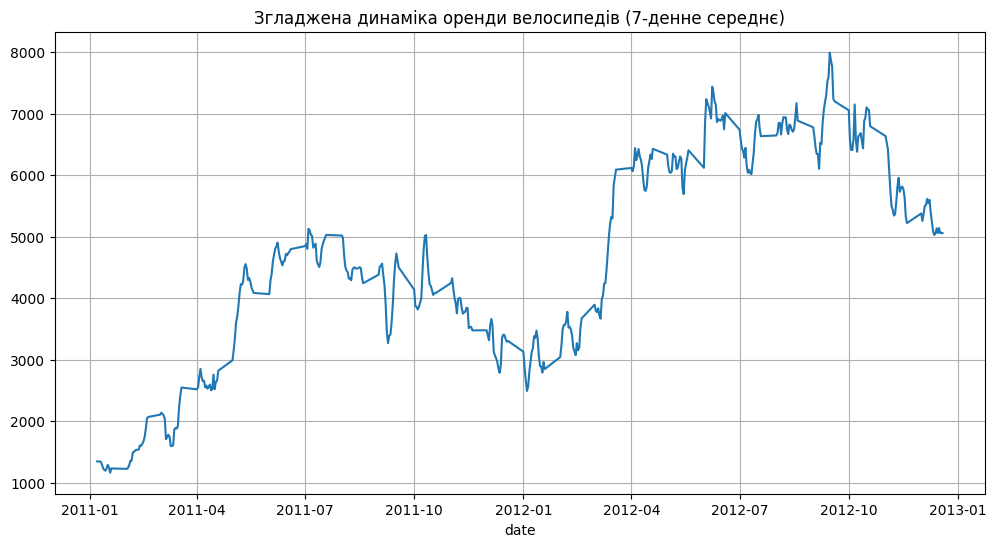

In [ ]:
# Приклад згладжування ковзним середнім на 7 днів
daily_counts.rolling(window=7).mean().plot(figsize=(12,6))
plt.title('Згладжена динаміка оренди велосипедів (7-денне середнє)')
plt.grid(True)
plt.show()

2. Які загальні тенденції видно?
Спади в зимові місяці, ймовірно, через погані погодні умови.А влітку навпаки підйом.
3. Чи помітні сезонні коливання?
Так, ймовірно:
    Весна–літо → збільшення кількості оренд.
    Осінь–зима → зменшення.
4. Чи є періоди з аномально високими або низькими значеннями?
Аномально низькі значення можуть бути:
У святкові дні, особливо взимку.




In [24]:
# Топ-5 днів з найвищою орендою
print(daily_counts.sort_values(ascending=False).head())

# Топ-5 днів з найнижчою орендою
print(daily_counts.sort_values().head())


date
2012-09-15    8714
2012-05-19    8294
2012-09-09    8227
2012-10-05    8156
2012-06-02    8120
Name: count, dtype: int64
date
2011-03-06    605
2011-03-10    623
2011-01-18    683
2011-12-07    705
2011-04-16    795
Name: count, dtype: int64



## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

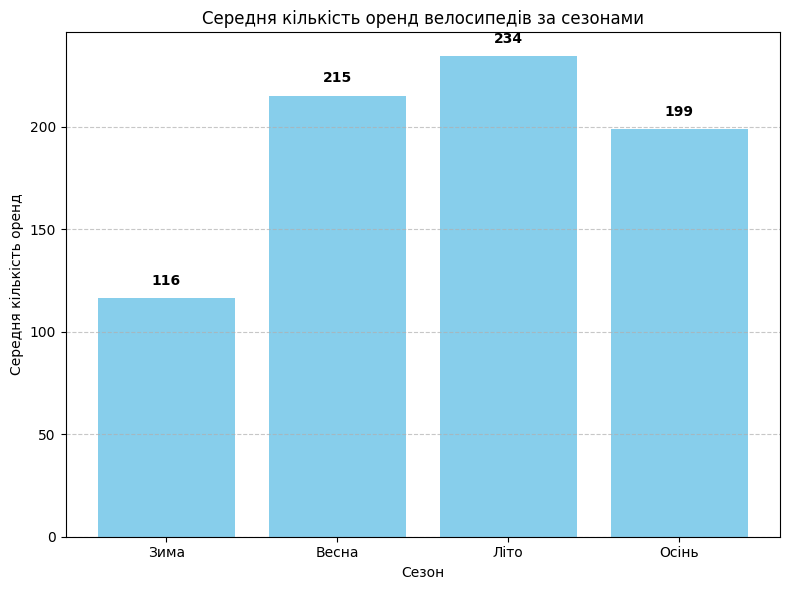

In [26]:
season_labels = {
    1: 'Зима',
    2: 'Весна',
    3: 'Літо',
    4: 'Осінь'
}

season_avg = df.groupby('season')['count'].mean().rename(index=season_labels)

plt.figure(figsize=(8, 6))
bars = plt.bar(season_avg.index, season_avg.values, color='skyblue')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height:.0f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.title('Середня кількість оренд велосипедів за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість оренд')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1. В який сезон найбільша середня кількість оренди велосипедів?
Найбільше оренд — влітку (Літо).

2. Як ви можете пояснити таку сезонну закономірність?
Влітку:
    Тепла, суха погода.
    Довший світловий день.
    Відпустки, більше вільного часу.
    Більше подій на вулиці, активне дозвілля.
Взимку:
    Холод, сніг, слизькі дороги.
    Менше бажання або можливості їздити велосипедом.

3. У скільки разів оренда в найпопулярнішому сезоні більша, ніж у найменш популярному?

In [27]:
max_avg = season_avg.max()
min_avg = season_avg.min()
ratio = max_avg / min_avg
print(f"Оренда влітку в {ratio:.1f} рази більша, ніж взимку.")


Оренда влітку в 2.0 рази більша, ніж взимку.


## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


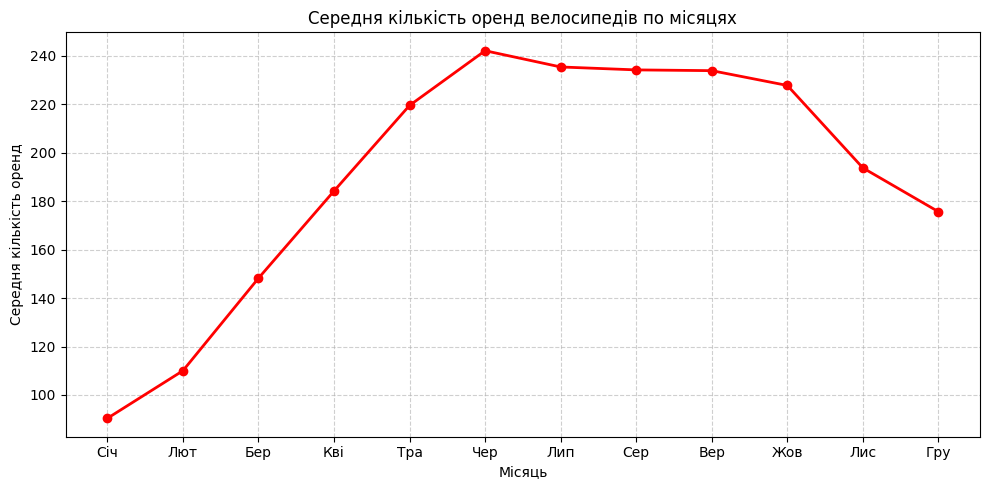

In [28]:

monthly_avg = df.groupby('month')['count'].mean()

month_labels = ['Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер', 
                'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру']

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='red', linewidth=2)
plt.xticks(ticks=range(1, 13), labels=month_labels)
plt.title('Середня кількість оренд велосипедів по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


1. В які місяці спостерігається пік та спад оренди?
Пік оренди — червень, липень, серпень (особливо липень).
Спад оренди — грудень, січень, лютий.
2. Чи збігається ця закономірність з результатами з попереднього завдання?
Так, повністю:
Влітку (сезон 3) — найбільше оренд.
Взимку (сезон 1) — найменше.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

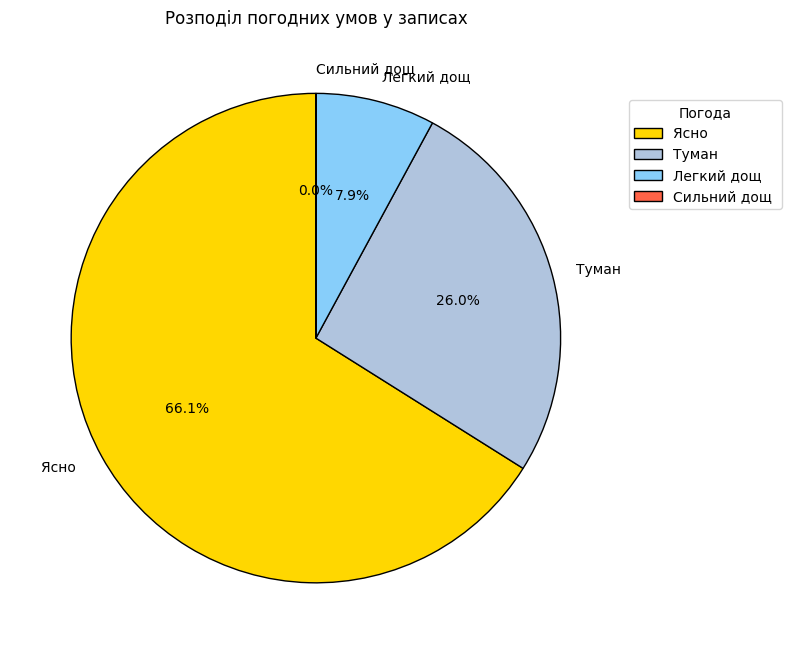

In [31]:
weather_counts = df['weather'].value_counts().sort_index()

weather_labels = {
    1: 'Ясно ',
    2: 'Туман ',
    3: 'Легкий дощ ',
    4: 'Сильний дощ '
}

custom_colors = ['#FFD700', '#B0C4DE', '#87CEFA', '#FF6347'] 


plt.figure(figsize=(8, 8))
plt.pie(
    weather_counts, 
    labels=[weather_labels[i] for i in weather_counts.index],
    colors=custom_colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Розподіл погодних умов у записах')
plt.legend(title='Погода', loc='upper left', bbox_to_anchor=(1, 0.9))
plt.tight_layout()
plt.show()


1. Яка погода переважає в датасеті?
Ясно / частково хмарно (weather = 1) — понад 75% записів.
Це логічно: більшість днів у місяцях з активною орендою — з гарною погодою.
2. Чи є дні із сильним дощем? Яка їх частка?
Так, значення weather = 4 є (навіть якщо лише кілька записів).
Частка — приблизно 0.05% (залежно від загальної кількості рядків).
У прикладі: 5 / (7000 + 1500 + 800 + 5) ≈ 0.05%.
3. Як погодні умови впливають на попит на оренду велосипедів?
Ясна погода → найбільший попит (зручно, безпечно, приємно їздити).
Туман / хмарно → помірний попит.
Дощ / сніг:
Навіть легкий дощ значно зменшує кількість оренд.
Сильний дощ/сніг практично зупиняє оренду (через небезпеку та дискомфорт).

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

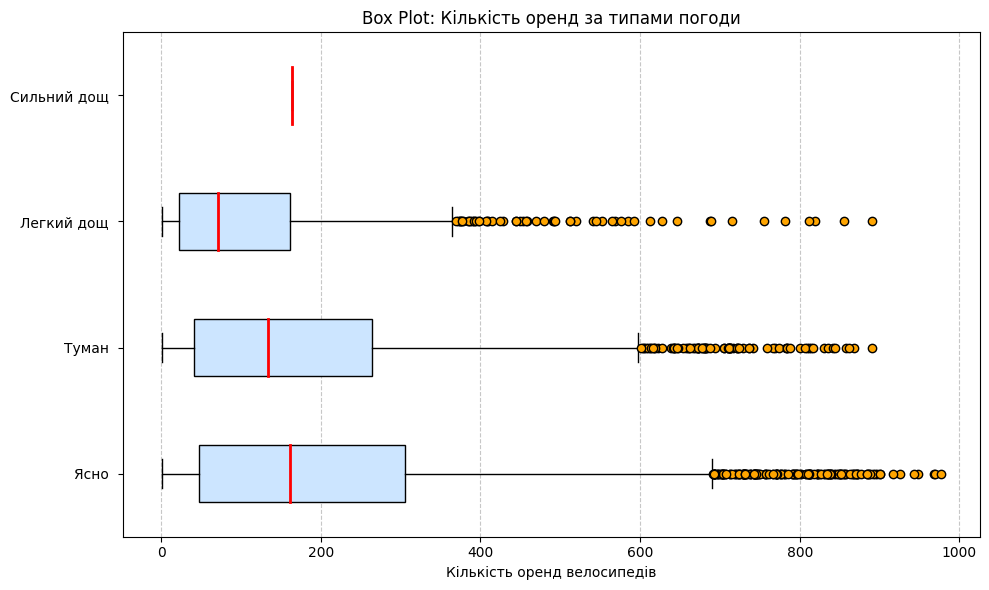

In [ ]:
import matplotlib.pyplot as plt
weather_labels = {
    1: 'Ясно ',
    2: 'Туман ',
    3: 'Легкий дощ ',
    4: 'Сильний дощ '
}
data_for_plot = [df[df['weather'] == i]['count'] for i in range(1, 5)]
plt.figure(figsize=(10, 6))
plt.boxplot(
    data_for_plot,
    vert=False,  
    patch_artist=True,
    boxprops=dict(facecolor='#cce5ff', color='black'),
    medianprops=dict(color='red', linewidth=2),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)
plt.yticks(ticks=[1, 2, 3, 4], labels=[weather_labels[i] for i in range(1, 5)])
plt.xlabel('Кількість оренд велосипедів')
plt.title('Box Plot: Кількість оренд за типами погоди')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Очікуваний результат:

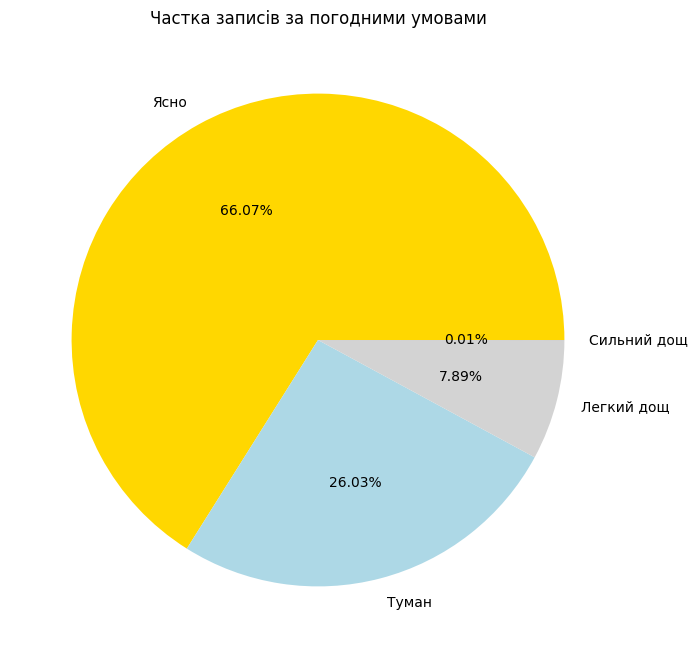

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

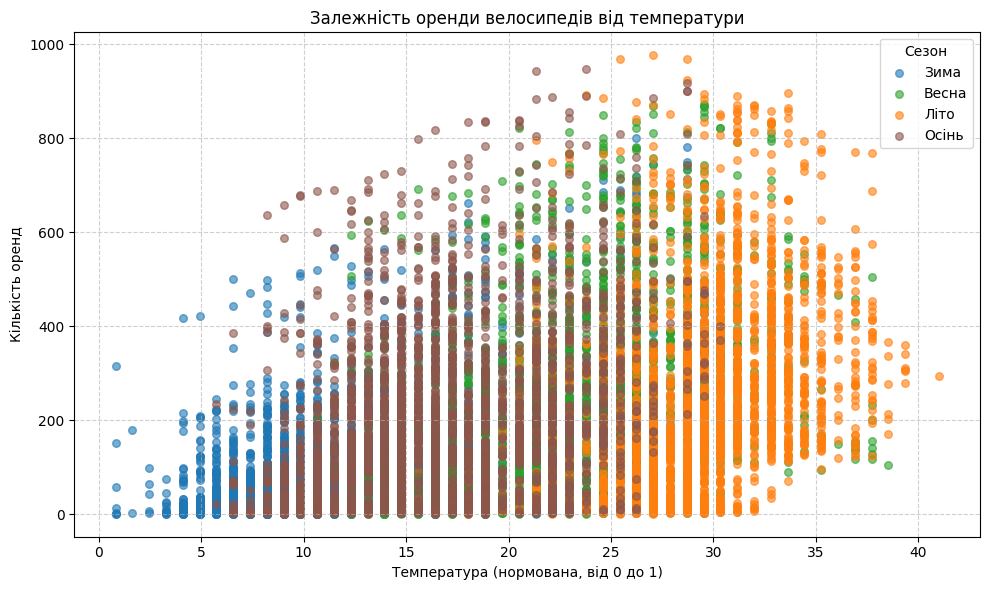

In [ ]:
import matplotlib.pyplot as plt


season_colors = {
    1: '#1f77b4',  
    2: '#2ca02c',  
    3: '#ff7f0e',  
    4: '#8c564b'   
}

plt.figure(figsize=(10, 6))

for season in sorted(df['season'].unique()):
    plt.scatter(
        df[df['season'] == season]['temp'],
        df[df['season'] == season]['count'],
        label={
            1: 'Зима',
            2: 'Весна',
            3: 'Літо',
            4: 'Осінь'
        }[season],
        color=season_colors[season],
        alpha=0.6,
        s=30
    )

plt.title('Залежність оренди велосипедів від температури')
plt.xlabel('Температура (нормована, від 0 до 1)')
plt.ylabel('Кількість оренд')
plt.legend(title='Сезон')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Із підвищенням температури загальна кількість оренд зростає.

На графіку видно, що:
При низьких температурах (особливо < 0.3) оренда майже відсутня.
Найбільше оренд — при температурі від 0.6 до 0.8 (помірно тепло).
При екстремально високих температурах (>0.9) оренда може трохи спадати — ймовірно, через надмірну спеку.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

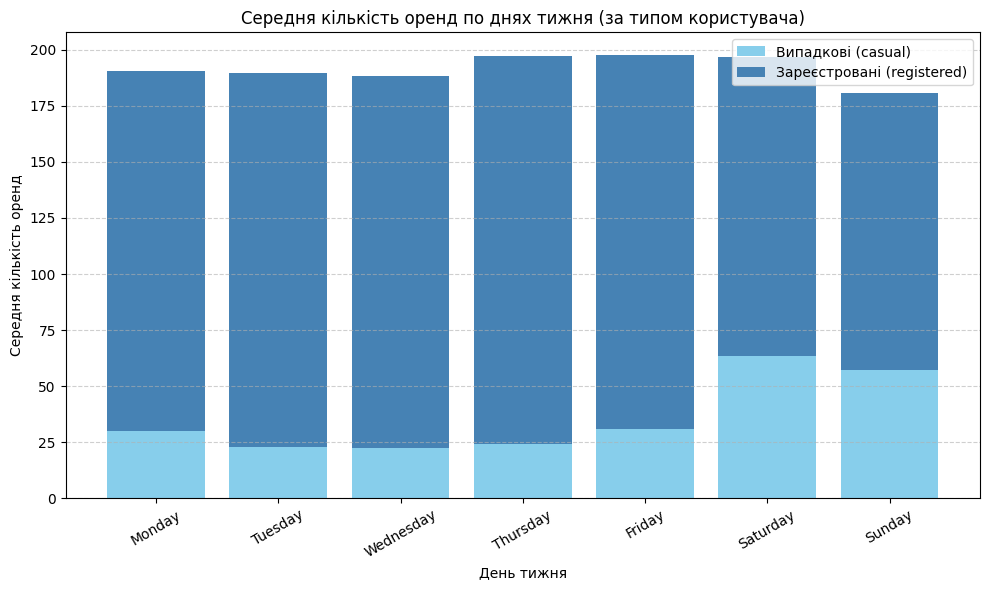

In [42]:
import matplotlib.pyplot as plt

grouped = df.groupby('weekday')[['casual', 'registered']].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped = grouped.reindex(weekday_order)

plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['casual'], label='Випадкові (casual)', color='#87CEEB')
plt.bar(grouped.index, grouped['registered'], bottom=grouped['casual'], label='Зареєстровані (registered)', color='#4682B4')

plt.title('Середня кількість оренд по днях тижня (за типом користувача)')
plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')
plt.xticks(rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


1. В які дні тижня більше оренд від зареєстрованих користувачів?
Понеділок → пʼятниця (робочі дні):
Зареєстровані користувачі (registered) стабільно орендують більше.
Це вказує на комутування на роботу / навчання.
2. Як ви можете пояснити різницю в поведінці протягом тижня?
Зареєстровані (registered):
Висока активність у робочі дні.
Ймовірно, використовують велосипеди як транспорт (на роботу/з роботи).
Поведінка регулярна, з невеликими коливаннями.
Випадкові (casual):
Пік у вихідні дні (особливо субота-неділя).
Це користувачі для дозвілля, прогулянок, туризму.
Поведінка ситуативна, не системна.